# Sklearn Tutorial: MultinomialNB and SVM

## STEP 1: Import packages and data

In [1]:
import numpy as np
import pandas as pd

tr = pd.read_csv("kaggle-sentiment/train.tsv", delimiter = "\t")
tr[:5]

In [8]:
y_labels = tr['Sentiment'].values
X_data = tr['Phrase'].values
print(y_labels[:5])
print(X_data[:5])

[1 2 2 2 2]
['A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .'
 'A series of escapades demonstrating the adage that what is good for the goose'
 'A series' 'A' 'series']


## STEP 2: Split train/test data for `HOLD-OUT TEST`

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_labels, test_size=0.4, random_state=0)

### 2.1 Check data -- is it balanced or skewed?

In [40]:
def get_array_for_barchart(dataset):
    unique, counts = np.unique(dataset, return_counts=True)
    return unique, counts

bc_y_train = get_array_for_barchart(y_train)
bc_y_test = get_array_for_barchart(y_test)

array([3, 2, 3, ..., 2, 3, 2])

In [20]:
bc_y_train

(array([0, 1, 2, 3, 4]), array([ 4141, 16449, 47718, 19859,  5469]))

In [21]:
bc_y_test

(array([0, 1, 2, 3, 4]), array([ 2931, 10824, 31864, 13068,  3737]))

### 2.2 Graph it

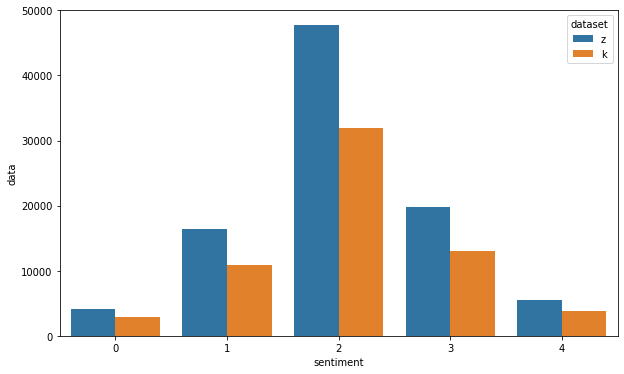

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt


x = bc_y_train[0].tolist()

train = bc_y_train[1].tolist()
test = bc_y_test[1].tolist()

# number_of_bars
n_bars = 2

df = pd.DataFrame(zip(x*n_bars, ["z"]*len(x)+["k"]*len(x), z+k), columns=["sentiment", "dataset", "data"])
plt.figure(figsize=(10, 6))
sns.barplot(x="sentiment", hue="dataset", y="data", data=df)
plt.show()

## STEP 3: Vectorization

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

bool_vect = CountVectorizer(encoding='latin-1', binary=True, min_df=5, stop_words='english')
count_vect = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')

`FIT`: Collect unique tokens into the vocabulary (```fit()```)

`TRANSFORM`: Convert each doc to vector based on vocabulary (```transform()```)

OR ```fit_transform()```

NOTE: Only use the vocab constructed from the training data to vectorize the test data
(we must use `transform` only not `fit_transform` which would generate new vocab from test data)

In [27]:
X_tr_vect = count_vect.fit_transform(X_train)

In [30]:
list(count_vect.vocabulary_)[:5]

['class', 'wilde', 'derring', 'chilling', 'affecting']

In [31]:
list(count_vect.vocabulary_.items())[:5]

[('class', 1858),
 ('wilde', 11742),
 ('derring', 2802),
 ('chilling', 1764),
 ('affecting', 313)]

In [37]:
sorted(count_vect.vocabulary_.items(),key=lambda item: item[1])[-5:]

[('ziyi', 11962),
 ('zombie', 11963),
 ('zone', 11964),
 ('zucker', 11965),
 ('zwick', 11966)]

## STEP 4: Train a Classifer

In [39]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB()

nb_clf.fit(X_tr_vect, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)